# STX Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
# !conda install -c conda-forge pystan
# !conda install -c conda-forge fbprophet -y
# !pip install holidays==0.9.12
# !pip install --upgrade plotly
# !pip3 install Cmake
# !pip install pystan==2.19.1.1
# !pip3 install prophet --no-cache-dir
# !conda install -c conda-forge fbprophet

In [ ]:
!python3 --version

Python 3.10.12


In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.defaults='colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("STX (1).csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-27,56.099998,57.110001,56.099998,56.360001,44.814964,2137900
1,2018-08-28,56.580002,57.200001,56.000000,56.459999,44.894478,1865900
2,2018-08-29,56.740002,56.910000,55.889999,55.980000,44.512794,2442600
3,2018-08-30,55.439999,55.750000,53.070000,53.139999,42.254555,4906300
4,2018-08-31,53.240002,53.750000,52.849998,53.540001,42.572620,3124300
...,...,...,...,...,...,...,...
1252,2023-08-18,63.939999,64.800003,63.630001,64.349998,64.349998,1611200
1253,2023-08-21,64.220001,65.550003,64.129997,65.500000,65.500000,1113100
1254,2023-08-22,66.349998,66.500000,65.669998,65.889999,65.889999,1840000
1255,2023-08-23,65.699997,66.470001,65.660004,66.160004,66.160004,1283900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,64.065736,65.058218,63.109944,64.112315,58.480053,2.813000e+06
std,18.792238,19.107800,18.470333,18.767563,19.047897,1.598423e+06
min,36.000000,37.000000,35.380001,36.130001,29.609917,7.483000e+05
25%,48.680000,49.410000,47.930000,48.669998,42.031315,1.841500e+06
50%,58.759998,59.410000,58.119999,58.790001,53.633953,2.442600e+06
75%,78.970001,80.209999,78.010002,79.199997,73.754898,3.275800e+06
max,115.970001,117.669998,114.300003,116.019997,108.747078,2.029020e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df,y="Close")

# Understanding Facebook Prophet

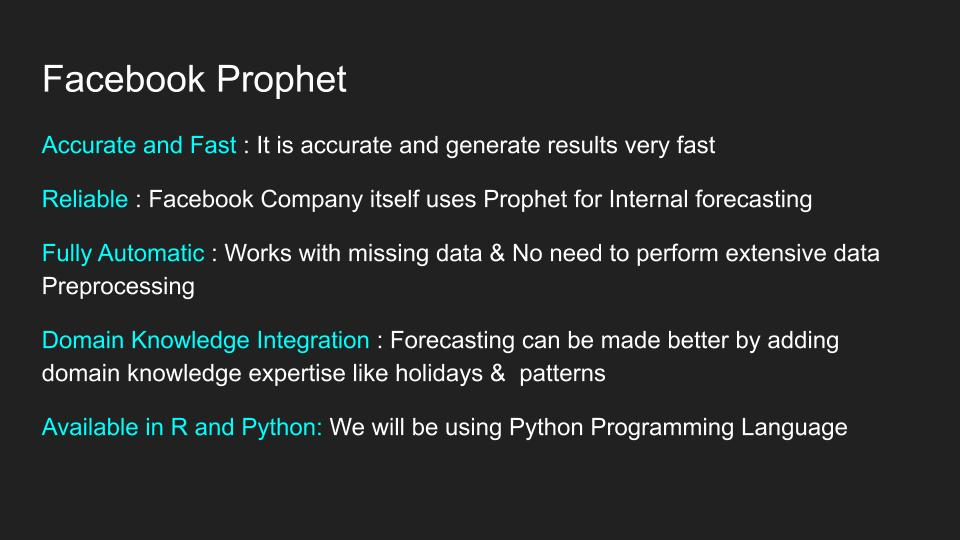

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-27,56.099998,57.110001,56.099998,56.360001,44.814964,2137900
1,2018-08-28,56.580002,57.200001,56.000000,56.459999,44.894478,1865900
2,2018-08-29,56.740002,56.910000,55.889999,55.980000,44.512794,2442600
3,2018-08-30,55.439999,55.750000,53.070000,53.139999,42.254555,4906300
4,2018-08-31,53.240002,53.750000,52.849998,53.540001,42.572620,3124300
...,...,...,...,...,...,...,...
1252,2023-08-18,63.939999,64.800003,63.630001,64.349998,64.349998,1611200
1253,2023-08-21,64.220001,65.550003,64.129997,65.500000,65.500000,1113100
1254,2023-08-22,66.349998,66.500000,65.669998,65.889999,65.889999,1840000
1255,2023-08-23,65.699997,66.470001,65.660004,66.160004,66.160004,1283900


In [ ]:
columns = ['Date','Close']
ndf = pd.DataFrame(df,columns = columns)

In [ ]:
ndf

,Date,Close
0,2018-08-27,56.360001
1,2018-08-28,56.459999
2,2018-08-29,55.980000
3,2018-08-30,53.139999
4,2018-08-31,53.540001
...,...,...
1252,2023-08-18,64.349998
1253,2023-08-21,65.500000
1254,2023-08-22,65.889999
1255,2023-08-23,66.160004


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2018-08-27,56.360001
1,2018-08-28,56.459999
2,2018-08-29,55.980000
3,2018-08-30,53.139999
4,2018-08-31,53.540001
...,...,...
1252,2023-08-18,64.349998
1253,2023-08-21,65.500000
1254,2023-08-22,65.889999
1255,2023-08-23,66.160004


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8mk64urh/69is7dnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8mk64urh/94yp92zi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19756', 'data', 'file=/tmp/tmp8mk64urh/69is7dnd.json', 'init=/tmp/tmp8mk64urh/94yp92zi.json', 'output', 'file=/tmp/tmp8mk64urh/prophet_modelznwnf0s6/prophet_model-20230825083521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:35:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:35:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-27,52.782369,46.886474,59.253361,52.782369,52.782369,0.200015,0.200015,0.200015,-0.362335,-0.362335,-0.362335,0.562349,0.562349,0.562349,0.0,0.0,0.0,52.982384
1,2018-08-28,52.711343,46.471283,58.221344,52.711343,52.711343,-0.314897,-0.314897,-0.314897,-0.622303,-0.622303,-0.622303,0.307407,0.307407,0.307407,0.0,0.0,0.0,52.396446
2,2018-08-29,52.640317,45.911534,58.146402,52.640317,52.640317,-0.607371,-0.607371,-0.607371,-0.660634,-0.660634,-0.660634,0.053263,0.053263,0.053263,0.0,0.0,0.0,52.032946
3,2018-08-30,52.569291,45.798515,58.309058,52.569291,52.569291,-0.764209,-0.764209,-0.764209,-0.565871,-0.565871,-0.565871,-0.198339,-0.198339,-0.198339,0.0,0.0,0.0,51.805082
4,2018-08-31,52.498265,45.619263,57.720814,52.498265,52.498265,-1.036379,-1.036379,-1.036379,-0.590560,-0.590560,-0.590560,-0.445819,-0.445819,-0.445819,0.0,0.0,0.0,51.461886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,2023-11-18,55.838141,47.130858,62.132918,52.556850,59.012984,-1.188183,-1.188183,-1.188183,1.400852,1.400852,1.400852,-2.589035,-2.589035,-2.589035,0.0,0.0,0.0,54.649958
1343,2023-11-19,55.816208,47.979227,61.914034,52.479767,59.035893,-1.080626,-1.080626,-1.080626,1.400851,1.400851,1.400851,-2.481477,-2.481477,-2.481477,0.0,0.0,0.0,54.735582
1344,2023-11-20,55.794274,45.800835,60.230087,52.346118,59.066332,-2.751448,-2.751448,-2.751448,-0.362335,-0.362335,-0.362335,-2.389114,-2.389114,-2.389114,0.0,0.0,0.0,53.042825
1345,2023-11-21,55.772340,45.997676,60.157542,52.247574,59.117068,-2.934466,-2.934466,-2.934466,-0.622303,-0.622303,-0.622303,-2.312162,-2.312162,-2.312162,0.0,0.0,0.0,52.837874


In [ ]:
px.line(forecast,x='ds',y='yhat')

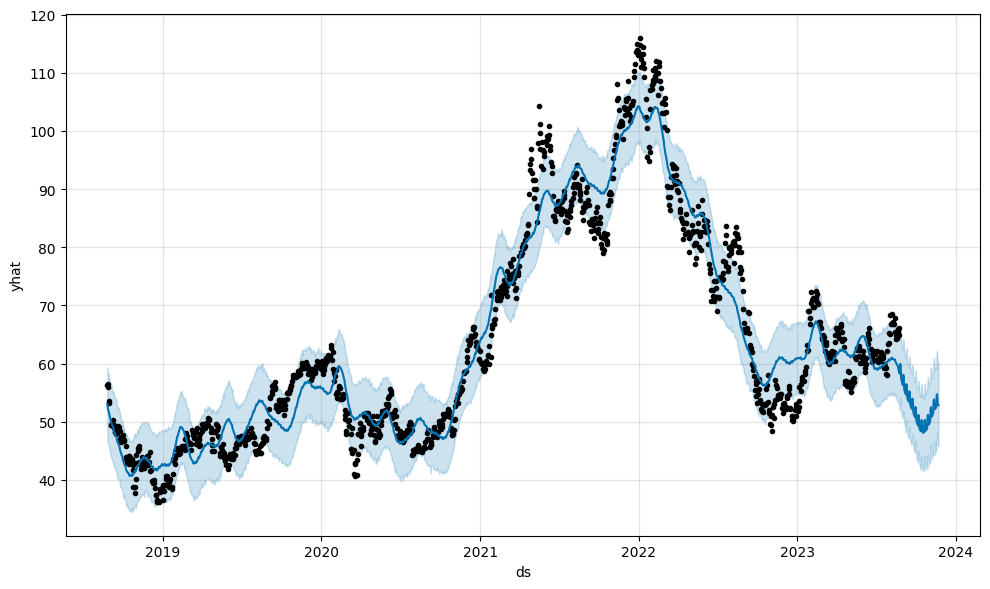

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='yhat')

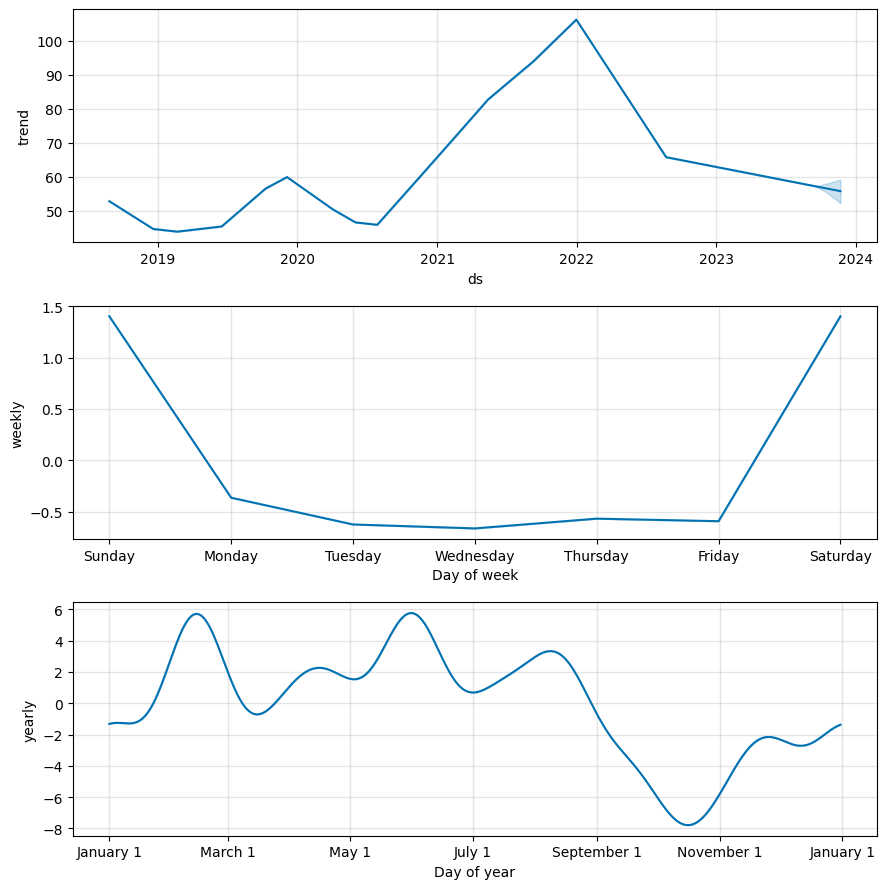

In [ ]:
figure=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>